In [1]:
#Machine learning library
import sklearn

#numerical packages in python
import numpy as np 

#Another numerical package, unused directly but is implicitly used in sklearn
import scipy as scp
#assert scp.__version__ >= "1.1.0" # scipy >= 1.1.0

#Package for data manipulation and analysis
import pandas as pd

#matplotlib magic for inline figures
%matplotlib inline 
import matplotlib # plotting library

In [2]:
import os
import tarfile
import urllib
DATASET_PATH = os.path.join("datasets", "airbnb")

In [3]:
#Other setup with necessary plotting

#Instead of using matplotlib direclty, we will use their nice pyplot interface defined as plt
import matplotlib.pyplot as plt

# Set random seed to make this notebook's output identical at every run
np.random.seed(42)

# Plotting Utilities

# Where to save the figures
ROOT_DIR = "."
IMAGES_PATH = os.path.join(ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_name, tight_layout=True, fig_extension="png", resolution=300):
    '''
        plt.savefig wrapper. refer to 
        https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html
    '''
    path = os.path.join(IMAGES_PATH, fig_name + "." + fig_extension)
    print("Saving figure", fig_name)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
def load_housing_data(airbnb_path):
    csv_path = os.path.join(airbnb_path, "AB_NYC_2019.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data(DATASET_PATH) # we load the pandas dataframe
housing.head() # show the first few elements of the dataframe
               # typically this is the first thing you do
               # to see how the dataframe looks like

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
# to see a concise summary of data types, null values, and counts
# use the info() method on the dataframe
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

[Response] Names, host ids, and host names can be problematic; they are objects but cannot be one hot encoded. 

In [7]:
del housing['name']
del housing['id']
del housing['host_id']
del housing['host_name']
del housing['neighbourhood']
del housing['last_review']
del housing['reviews_per_month']
housing

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,40.67853,-73.94995,Private room,70,2,0,2,9
48891,Brooklyn,40.70184,-73.93317,Private room,40,4,0,2,36
48892,Manhattan,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,Manhattan,40.75751,-73.99112,Shared room,55,1,0,6,2


In [8]:
housing.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


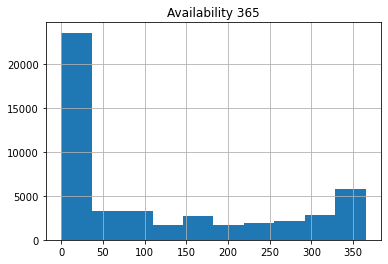

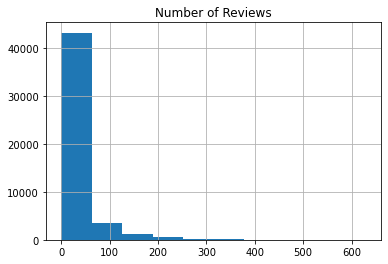

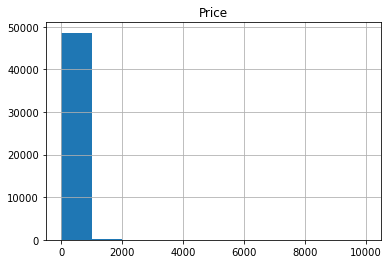

In [9]:
#Histogram (not part of HW!!)
housing["availability_365"].hist()
plt.title("Availability 365")
plt.show()
housing["number_of_reviews"].hist()
plt.title("Number of Reviews")
plt.show()
housing["price"].hist()
plt.title("Price")
plt.show()

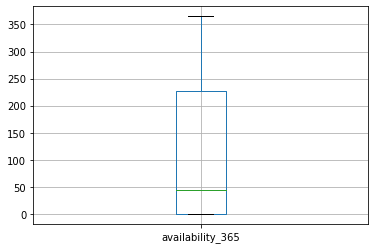

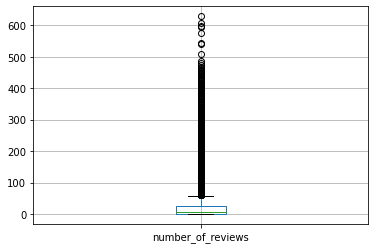

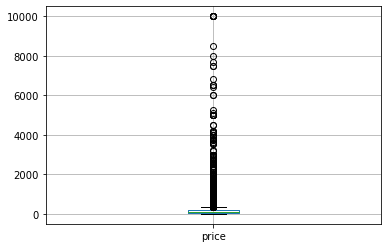

In [10]:
housing.boxplot(column = ['availability_365'])  
plt.show()
housing.boxplot(column = ['number_of_reviews'])  
plt.show()
housing.boxplot(column = ['price'])  
plt.show()

[Response] There is a huge variance in number of reviews and prices. In terms of availability, the majority of properties are available around a few days to 200 days. 

In [11]:
housing_group = housing.groupby('neighbourhood_group')
#Has the mean for every column grouped by ocean proximity
housing_median = housing_group.median()
housing_median

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,
Bronx,40.84615,-73.892540,65.0,2.0,9.0,1.0,148.0
Brooklyn,40.68752,-73.951740,90.0,3.0,6.0,1.0,28.0
Manhattan,40.76088,-73.980420,150.0,3.0,4.0,1.0,36.0
Queens,40.74479,-73.895045,75.0,2.0,7.0,1.0,98.0
Staten Island,40.62154,-74.089300,75.0,2.0,12.0,1.0,219.0


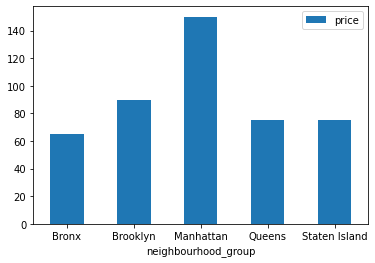

In [12]:
housing_median.plot.bar(y='price', rot=0)
plt.show()

[Response] Manhattan has the highest median price among all the neighborhoods. 

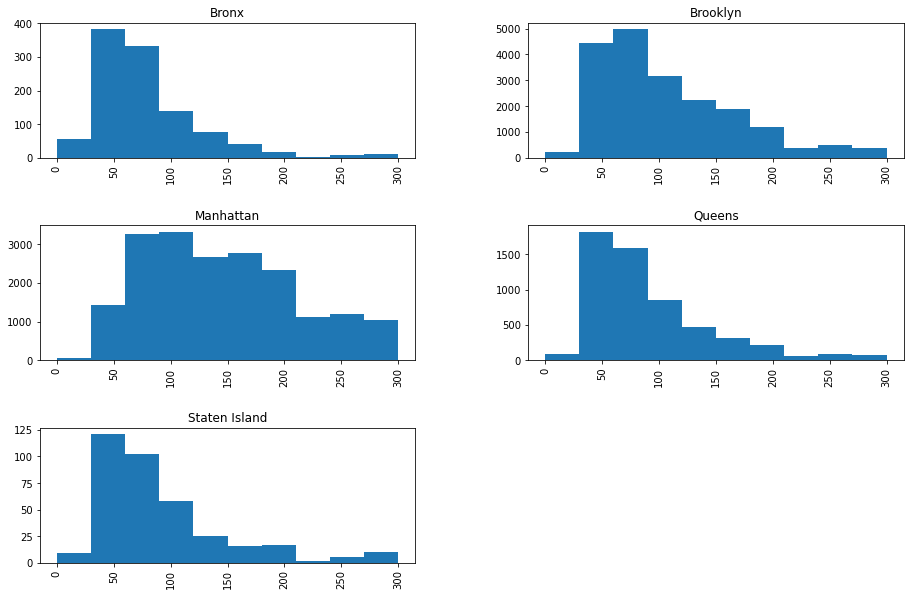

In [13]:
housing["price"].hist(by=housing["neighbourhood_group"], range = [0,300], figsize=(15,10))
plt.show()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

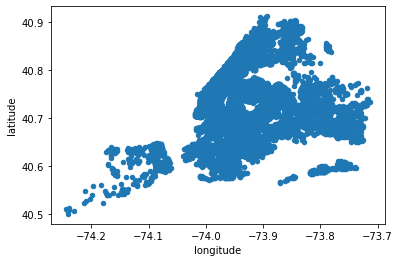

In [14]:
housing.plot(kind="scatter", x="longitude", y="latitude")
# save_fig("bad_visualization_plot")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

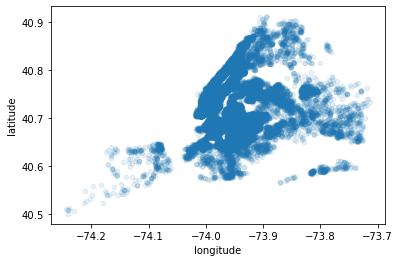

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
#save_fig("better_visualization_plot")

In [16]:
# housing.plot(kind="scatter", x="median_income", y="median_house_value",
#              alpha=0.1)
# plt.axis([0, 16, 0, 550000])

In [17]:
corr_matrix = housing.corr()
corr_matrix

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
latitude,1.000000,0.084788,0.033939,0.024869,-0.015389,0.019517,-0.010983
longitude,0.084788,1.000000,-0.150019,-0.062747,0.059094,-0.114713,0.082731
price,0.033939,-0.150019,1.000000,0.042799,-0.047954,0.057472,0.081829
minimum_nights,0.024869,-0.062747,0.042799,1.000000,-0.080116,0.127960,0.144303
number_of_reviews,-0.015389,0.059094,-0.047954,-0.080116,1.000000,-0.072376,0.172028
calculated_host_listings_count,0.019517,-0.114713,0.057472,0.127960,-0.072376,1.000000,0.225701
availability_365,-0.010983,0.082731,0.081829,0.144303,0.172028,0.225701,1.000000


[Response] Latitude, minimum nights of stay, calculated host listings count and availabilty have a positive correlation with the price. The rest has negative correlation. 

In [18]:
# from pandas.plotting import scatter_matrix
# attributes = ["price", "minimum_nights", "number_of_reviews", "calculated_host_listings_count",
#               "availability_365", "latitude", "longitude"]
# scatter_matrix(housing[attributes], figsize=(20, 15))

PART 2: Prepare the Data

In [19]:
housing_tar = housing["price"].copy()
housing_feat = housing[["neighbourhood_group","latitude","longitude","room_type","minimum_nights","number_of_reviews",
                        "calculated_host_listings_count","availability_365"]].copy()
housing_cat = housing_feat[["neighbourhood_group", "room_type"]].copy() #Categorical Features
housing_num = housing_feat[["latitude", "longitude", "minimum_nights", "number_of_reviews", "calculated_host_listings_count",
                            "availability_365"]].copy() #Numerical Features

In [20]:
#Distance Function
def distance_func(loc_a,loc_b):
    lat1,lon1 = loc_a
    lat2,lon2 = loc_b
    r = 6371
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
    res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
    return np.round(res, 2)

In [21]:
housing["max_yearly_bookings"] = housing["availability_365"]/housing["minimum_nights"]
housing["distance_from_JFK"] = distance_func((housing["latitude"], housing["longitude"]), (40.641766, -73.780968))
housing.head(3)

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,max_yearly_bookings,distance_from_JFK
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,6,365,365.000000,16.16
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,355.000000,21.14
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,1,365,121.666667,23.02


In [22]:
housing_num["max_yearly_bookings"] = housing_num["availability_365"]/housing_num["minimum_nights"]
housing_num["distance_from_JFK"] = distance_func((housing_num["latitude"], housing_num["longitude"]), (40.641766, -73.780968))

In [23]:
housing_num.head(3)

,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,max_yearly_bookings,distance_from_JFK
0,40.64749,-73.97237,1,9,6,365,365.000000,16.16
1,40.75362,-73.98377,1,45,2,355,355.000000,21.14
2,40.80902,-73.94190,3,0,1,365,121.666667,23.02


### [10 pts] Create a sklearn pipeline that performs the following operations of the feature data

Now, we will create a full pipeline that processes the data before creating the model.

For the numerical data, perfrom the following operations in order:
- Use a SimpleImputer that imputes using the median value
- Use the custom feature augmentation made in the previous part
- Use StandardScaler to standardize the mean and standard deviation

For categorical features, perform the following:
- Perform one hot encoding on all the remaining categorical features: {neighbourhood_group, room_type} 

**After making the pipeline, perform the transform operation on the feature data and print out the first 3 rows.**

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [25]:
#Splits names into numerical and categorical features
numerical_features = list(housing_num)
categorical_features = list(housing_cat)
print(numerical_features, categorical_features)

['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'max_yearly_bookings', 'distance_from_JFK'] ['neighbourhood_group', 'room_type']


In [26]:
housing_pipeline = make_column_transformer(
    # ('imputer', SimpleImputer(strategy="median"))
    (OneHotEncoder(categories='auto'), categorical_features),
    (StandardScaler(), numerical_features)
)

In [27]:
housing_feat.head(10)

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,1,9,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,1,45,2,355
2,Manhattan,40.80902,-73.94190,Private room,3,0,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,1,270,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,10,9,1,0
5,Manhattan,40.74767,-73.97500,Entire home/apt,3,74,1,129
6,Brooklyn,40.68688,-73.95596,Private room,45,49,1,0
7,Manhattan,40.76489,-73.98493,Private room,2,430,1,220
8,Manhattan,40.80178,-73.96723,Private room,2,118,1,0
9,Manhattan,40.71344,-73.99037,Entire home/apt,1,160,4,188


In [28]:
housing_prepared = housing_pipeline.fit_transform(housing)
print(housing_prepared[0:3])

[[ 0.          1.          0.          0.          0.          0.
   1.          0.         -1.4938492  -0.43765209 -0.29399621 -0.32041358
  -0.03471643  1.91625031  3.59673033 -0.49694202]
 [ 0.          0.          1.          0.          0.          1.
   0.          0.          0.45243602 -0.68463915 -0.29399621  0.48766493
  -0.15610444  1.84027456  3.48197973  0.65100123]
 [ 0.          0.          1.          0.          0.          0.
   1.          0.          1.46839948  0.22249666 -0.19648442 -0.52243321
  -0.18645145  1.91625031  0.80446575  1.08436134]]


<b>TRAIN/TEST SPLIT

In [29]:
from sklearn.model_selection import train_test_split
data_target = housing['price']
train, test, target, target_test = train_test_split(housing, data_target, test_size=0.2, random_state=0)

train = housing_pipeline.fit_transform(train)
test = housing_pipeline.fit_transform(test)

<b>LINEAR REGRESSION

In [30]:
from sklearn.linear_model import LinearRegression

#Instantiate a linear regresion class
lin_reg = LinearRegression()
#Train the class using the .fit function
lin_reg.fit(train, target)

# let's try the full preprocessing pipeline on a few training instances
data = train
labels = target

#Uses predict to get the predicted target values
print("Predictions:", lin_reg.predict(data)[:5])
print("Actual labels:", list(labels)[:5])

Predictions: [109.5625    98.59375  274.09375  166.796875 180.71875 ]
Actual labels: [80, 60, 98, 95, 100]


In [31]:
from sklearn.metrics import mean_squared_error, r2_score

preds = lin_reg.predict(train)
mse = mean_squared_error(target, preds)
rmse = np.sqrt(mse)
print("Train Set MSE:", mse)
print("Train Set RMSE:", rmse)
print("Train Set R^2 = ", r2_score(target, preds))

Train Set MSE: 52635.83930934598
Train Set RMSE: 229.42501892632805
Train Set R^2 =  0.09764268884631666


In [32]:
#Instantiate a linear regresion class
lin_reg = LinearRegression()
#Train the class using the .fit function
lin_reg.fit(train, target)

# let's try the full preprocessing pipeline on a few training instances
data = test
labels = target_test

#Uses predict to get the predicted target values
print("Predictions:", lin_reg.predict(data)[:5])
print("Actual labels:", list(labels)[:5])

Predictions: [260.5625    266.4140625 172.53125   112.8828125 166.453125 ]
Actual labels: [225, 649, 300, 26, 125]


In [33]:
from sklearn.metrics import mean_squared_error, r2_score

preds = lin_reg.predict(test)
mse = mean_squared_error(target_test, preds)
rmse = np.sqrt(mse)
print("Test Set MSE:", mse)
print("Test Set RMSE:", rmse)
print("Test Set R^2 = ", r2_score(target_test, preds))

Test Set MSE: 48605.93869382119
Test Set RMSE: 220.46754567015344
Test Set R^2 =  0.11686957343300941
